<a href="https://colab.research.google.com/github/hulyacansiz/Deep_Learning/blob/main/Tensorflow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from matplotlib import style
#style.use('dark_background')
style.use('seaborn-ticks')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df = pd.read_csv('/content/drive/MyDrive/DATA/kc_house_data.csv')

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


# EDA

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [15]:
df.describe().T #df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


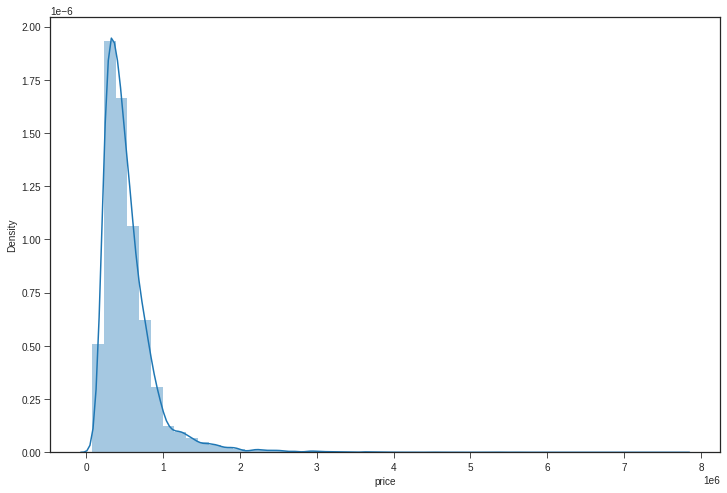

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


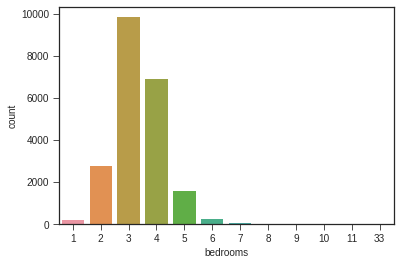

In [17]:
sns.countplot(df['bedrooms'])

In [18]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
df.corr()['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

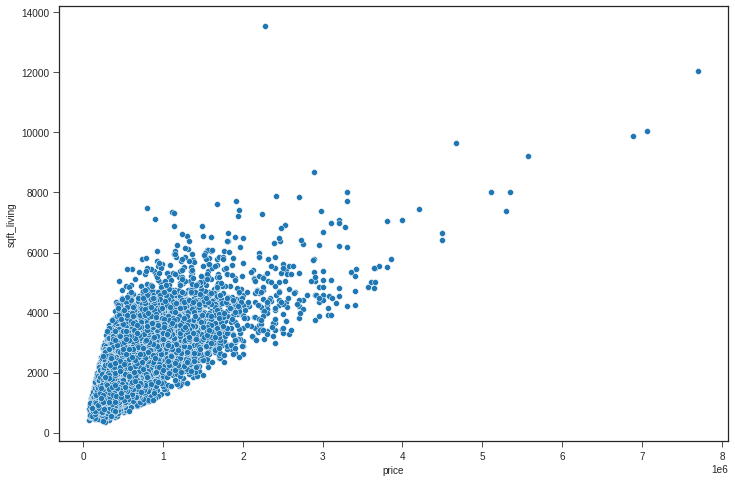

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

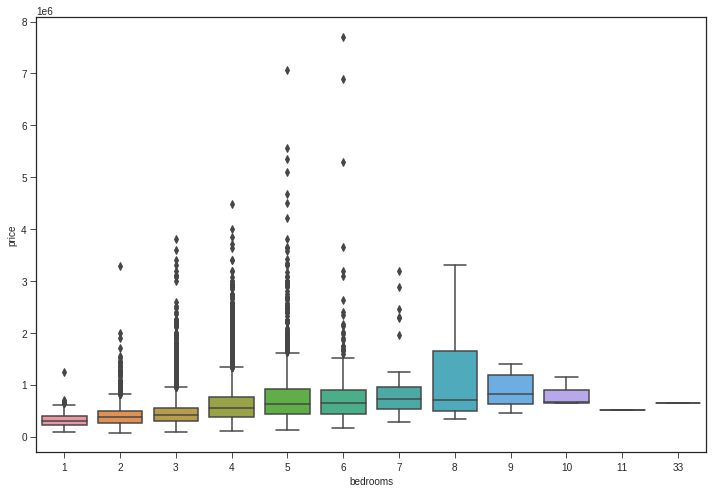

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

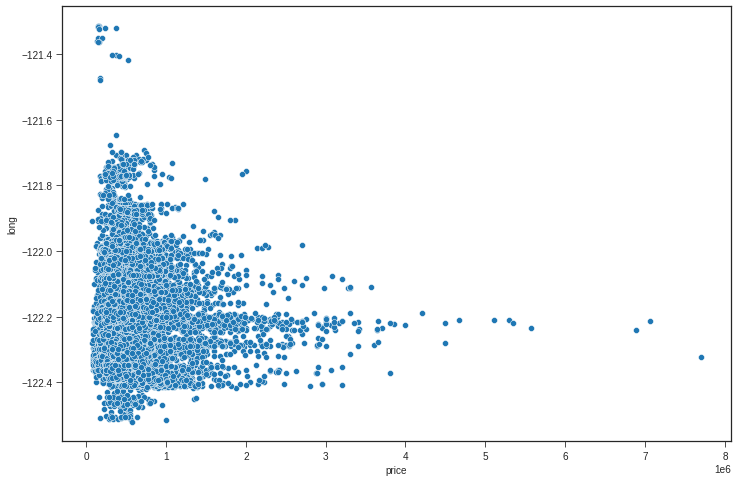

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

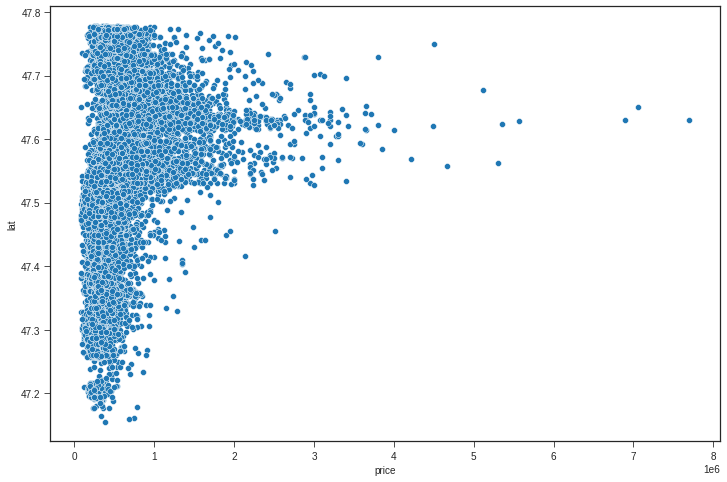

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

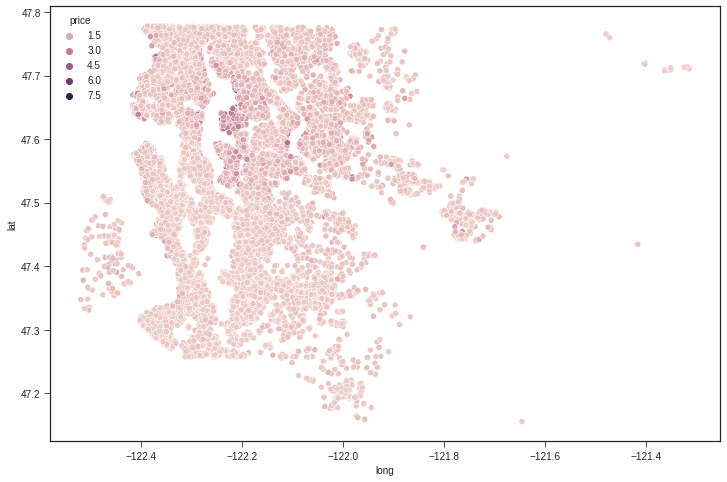

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [25]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [26]:
len(df) * (0.01)

215.97

In [27]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [28]:
non_top_1_perc.sort_values('price',ascending=False).head(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.000,4,3.500,4370,8510,2.000,0,1,3,10,3610,760,2003,0,98004,47.588,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.000,4,4.000,4430,31353,2.000,0,0,3,12,4430,0,1998,0,98005,47.642,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.000,4,2.750,3120,7898,1.000,1,4,4,8,1560,1560,1963,0,98034,47.717,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.000,5,4.500,6200,23373,3.000,0,1,4,11,5050,1150,1988,0,98040,47.563,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.000,3,1.750,3330,12566,1.000,1,4,4,8,1940,1390,1960,0,98040,47.529,-122.220,3730,16560
15363,1568100920,4/8/2015,1950000.000,4,2.500,3440,14554,2.000,1,4,3,8,2170,1270,2012,0,98155,47.736,-122.286,3170,11810
16238,3760500280,10/14/2014,1950000.000,3,2.500,2510,12779,1.500,0,4,3,10,2510,0,1968,0,98034,47.698,-122.231,2810,12225
18860,4389201241,12/30/2014,1950000.000,4,4.000,4690,6900,2.000,0,0,3,11,3480,1210,2001,0,98004,47.617,-122.216,2800,11240
14241,2425049107,3/5/2015,1950000.000,4,3.750,4150,17424,1.000,0,0,3,9,3130,1020,1963,2000,98039,47.639,-122.236,3930,21420
556,5486800070,6/20/2014,1950000.000,7,3.500,4640,15235,2.000,0,1,3,11,2860,1780,1965,2003,98040,47.567,-122.231,3230,20697


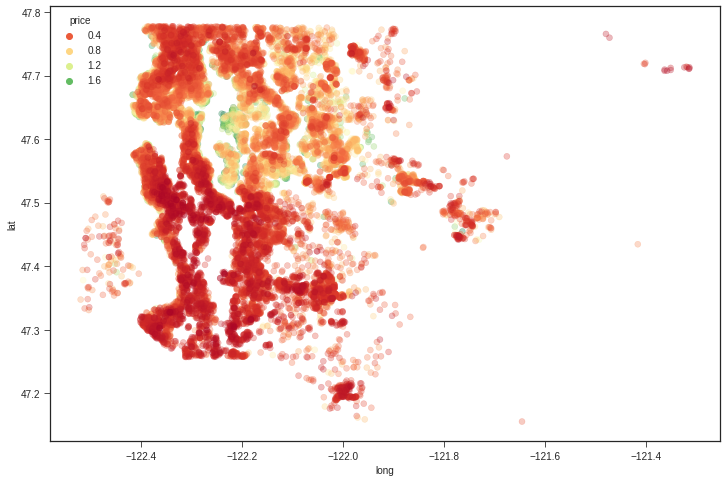

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',palette='RdYlGn',alpha=0.3,edgecolor=None) #palette='CMRmap_r'

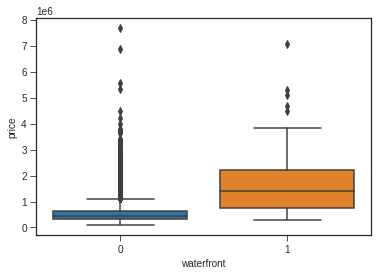

In [30]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [31]:
df = df.drop('id',axis=1)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [34]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
df['month'] = df['date'].apply(lambda date:date.month)

In [36]:
df['year'] = df['date'].apply(lambda date:date.year)

In [37]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


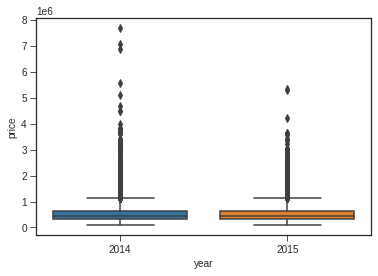

In [38]:
sns.boxplot(x='year',y='price',data=df)

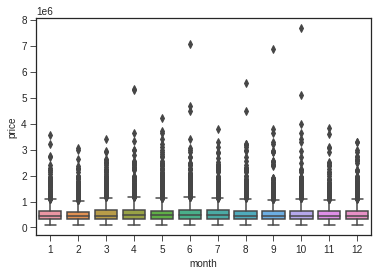

In [39]:
sns.boxplot(x='month',y='price',data=df)

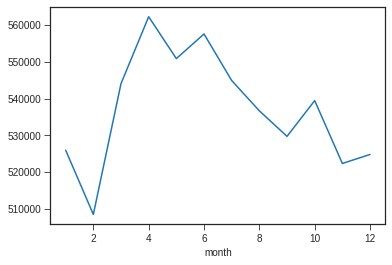

In [40]:
df.groupby('month').mean()['price'].plot()

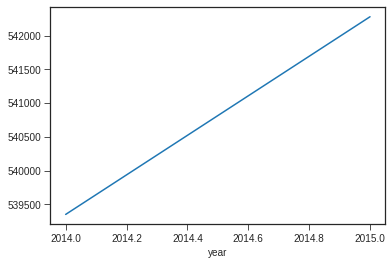

In [41]:
df.groupby('year').mean()['price'].plot()

In [42]:
df = df.drop('date',axis=1)

In [43]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [44]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


In [45]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [46]:
df = df.drop('zipcode',axis=1)

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,47.511,-122.257,1340,5650,10,2014
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,47.721,-122.319,1690,7639,12,2014
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,47.738,-122.233,2720,8062,2,2015
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,47.521,-122.393,1360,5000,12,2014
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,47.617,-122.045,1800,7503,2,2015


In [48]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [49]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# Scale and Train Test Split

In [50]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [56]:
X_test = scaler.transform(X_test)

In [57]:
X_test

array([[0.2       , 0.03333333, 0.03644647, ..., 0.0088806 , 0.09090909,
        1.        ],
       [0.2       , 0.06666667, 0.08656036, ..., 0.00581357, 0.81818182,
        0.        ],
       [0.3       , 0.23333333, 0.1078208 , ..., 0.05679519, 0.18181818,
        1.        ],
       ...,
       [0.2       , 0.16666667, 0.09339408, ..., 0.00855667, 0.45454545,
        0.        ],
       [0.4       , 0.4       , 0.18147304, ..., 0.00452128, 0.63636364,
        0.        ],
       [0.1       , 0.16666667, 0.0523918 , ..., 0.01849063, 0.36363636,
        0.        ]])

In [63]:
X_train.shape

(15117, 19)

creating model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [70]:
model.fit(x=X_train,y=y_train,validation_data =(X_test,y_test),batch_size=128,epochs= 400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 27313461248.0000 - val_loss: 29436672000.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 27334944768.0000 - val_loss: 29398775808.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 27309924352.0000 - val_loss: 29394860032.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 27295907840.0000 - val_loss: 29376284672.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 27320068096.0000 - val_loss: 29444161536.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 27284377600.0000 - val_loss: 29387909120.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 27273867264.0000 - val_loss: 29376833536.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 27296888832.0000 - val_loss: 29376671744.0000
Epoch 9/400
119/119 [===========

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 20        
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


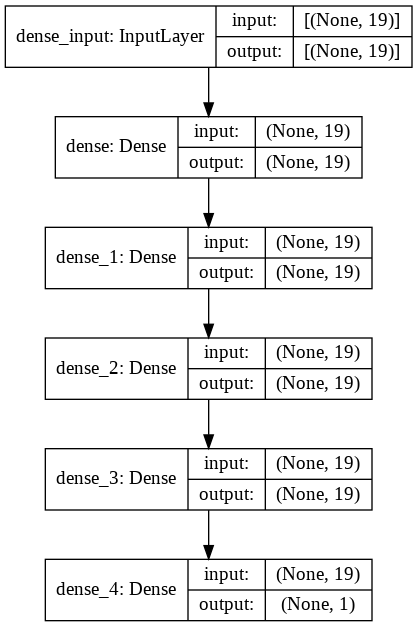

In [72]:
from tensorflow.keras.utils import plot_model
dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [73]:
losses = pd.DataFrame(model.history.history)

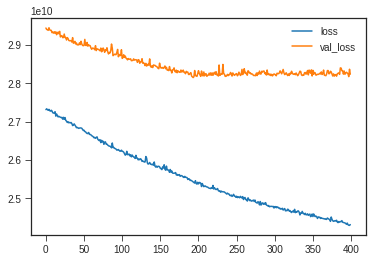

In [74]:
losses.plot()

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [79]:
y_pred = model.predict(X_test)

In [80]:
mean_absolute_error(y_test,y_pred)

101698.87996841242

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred))

168033.0451984559

In [83]:
df['price'].mean()

540296.5735055795

In [84]:
explained_variance_score(y_test,y_pred)

0.7870938379879149

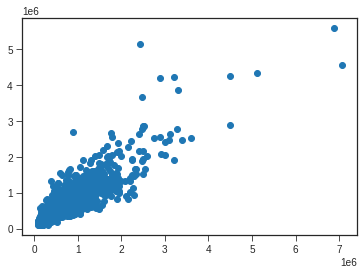

In [86]:
# Our predictions
plt.scatter(y_test,y_pred)

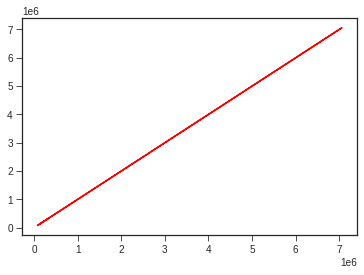

In [92]:
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [93]:
single_house = df.drop('price',axis=1).iloc[5]

In [95]:
single_house

bedrooms             4.000
bathrooms            4.500
sqft_living       5420.000
sqft_lot        101930.000
floors               1.000
waterfront           0.000
view                 0.000
condition            3.000
grade               11.000
sqft_above        3890.000
sqft_basement     1530.000
yr_built          2001.000
yr_renovated         0.000
lat                 47.656
long              -122.005
sqft_living15     4760.000
sqft_lot15      101930.000
month                5.000
year              2014.000
Name: 5, dtype: float64

In [96]:
single_house = scaler.transform(single_house.values.reshape(-1,19 ))
model.predict(single_house)

array([[1361195.2]], dtype=float32)

In [97]:
df.iloc[5]

price           1230000.000
bedrooms              4.000
bathrooms             4.500
sqft_living        5420.000
sqft_lot         101930.000
floors                1.000
waterfront            0.000
view                  0.000
condition             3.000
grade                11.000
sqft_above         3890.000
sqft_basement      1530.000
yr_built           2001.000
yr_renovated          0.000
lat                  47.656
long               -122.005
sqft_living15      4760.000
sqft_lot15       101930.000
month                 5.000
year               2014.000
Name: 5, dtype: float64